In [3]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.font_manager as fm

In [44]:
#csv 불러오기
filename = "melon_chart.csv"
df = pd.read_csv(filename)
df['singer'], df['album']  = df['album'], df['singer']

df2

,rank,title,singer,album,date,like
0,1,Perfect Night,LE SSERAFIM (르세라핌),Perfect Night,2024.01.01 ~ 2024.01.07,114126
1,2,Drama,aespa,Drama - The 4th Mini Album,2024.01.01 ~ 2024.01.07,85715
2,3,To. X,태연 (TAEYEON),To. X - The 5th Mini Album,2024.01.01 ~ 2024.01.07,143705
3,4,비의 랩소디,임재현,비의 랩소디,2024.01.01 ~ 2024.01.07,68730
4,5,첫 눈,EXO,겨울 스페셜 앨범 '12월의 기적 (Miracles In December)',2024.01.01 ~ 2024.01.07,287039
...,...,...,...,...,...,...
37849,96,그날 이후로,나윤권,김형석 With 나윤권,2010.12.26 ~ 2011.01.01,2378
37850,97,I'll Be Back,2PM,Still 2:00pm,2010.12.26 ~ 2011.01.01,9492
37851,98,널 지우는 일,김지수,널 지우는 일,2010.12.26 ~ 2011.01.01,1635
37852,99,Thanks To,"용준형, 양요섭",My Story,2010.12.26 ~ 2011.01.01,18396


In [30]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [49]:
df

,rank,title,singer,album,date,like
9399,100,가끔은,정효빈,가끔은,2020-01-06,15911
9371,72,영화 속에 나오는 주인공처럼,펀치 (Punch),동백꽃 필 무렵 (KBS2 수목드라마) OST - Part.6,2020-01-06,73454
9370,71,노을,다비치,사랑의 불시착 OST Part 3,2020-01-06,42408
9369,70,중2병,"염따, 딥플로우, 팔로알토 (Paloalto), The Quiett, 사이먼 도미닉",Dingo X DAMOIM (Part 3),2020-01-06,32258
9368,69,나의 어깨에 기대어요,10CM,호텔 델루나 OST Part.2,2020-01-06,121057
...,...,...,...,...,...,...
1428,29,Super Lady,(여자)아이들,2,2024-04-08,34920
1427,28,Hype Boy,NewJeans,NewJeans 1st EP 'New Jeans',2024-04-08,287865
1425,26,너의 모든 순간,성시경,별에서 온 그대 OST Part.7,2024-04-08,295817
1436,37,Siren,RIIZE,Siren,2024-04-08,41339


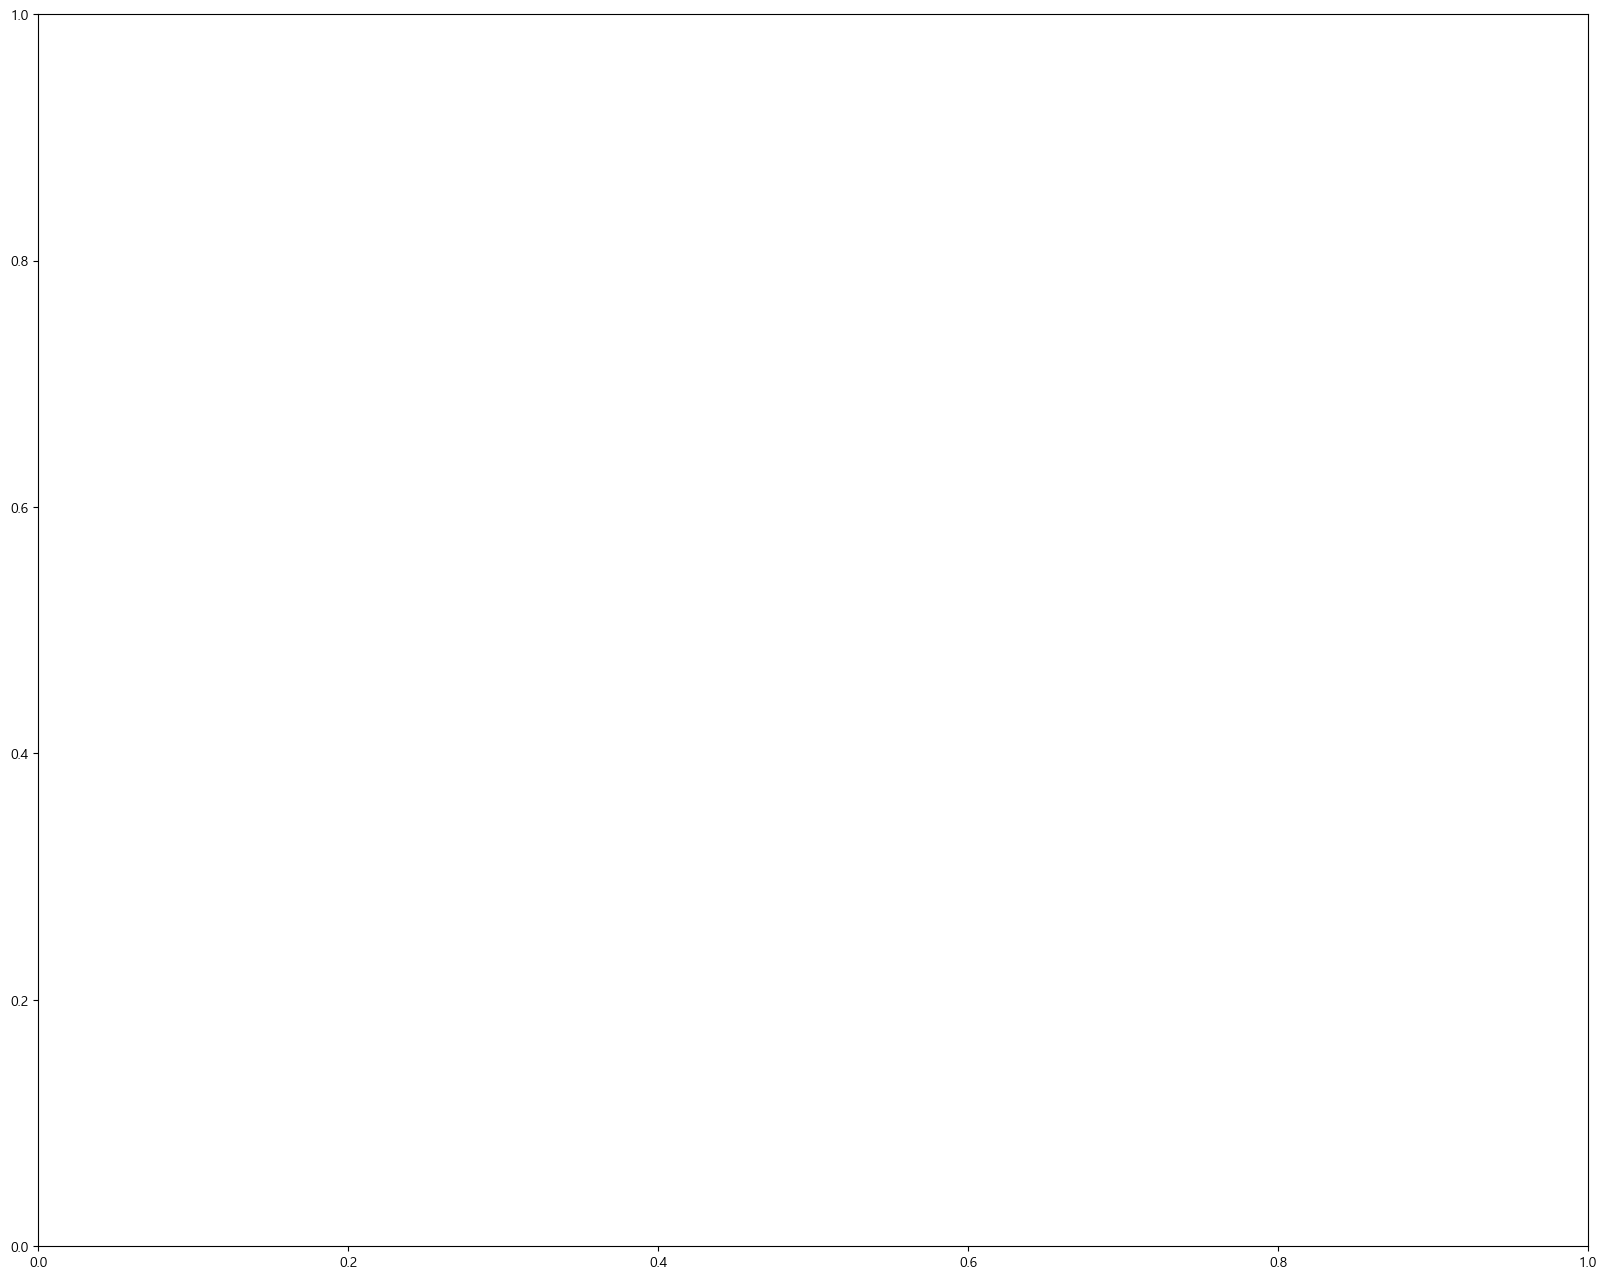

<Figure size 640x480 with 0 Axes>

In [54]:
filename = "melon_chart.csv"
df = pd.read_csv(filename)
df['singer'], df['album']  = df['album'], df['singer']

# 날짜 컬럼을 datetime으로 변환
df['date'] = pd.to_datetime(df['date'].str[:10])

# 2020년부터 2024년까지 데이터만 필터링
df = df[(df['date'].dt.year >= 2020) & (df['date'].dt.year <= 2024)]

# 날짜로 정렬
df = df.sort_values(by='rank')

# 날짜별로 그룹화
grouped = df.groupby(df['date'].dt.to_period('D'))

# 그래프 초기화
fig, ax = plt.subplots(figsize=(20, 16))

def update(frame):
    ax.clear()
    current_date = frame.to_timestamp()
    current_df = grouped.get_group(frame).head(20)
    ax.barh(current_df['title'], current_df['like'], color='skyblue')
    ax.set_xlabel('Rank')
    ax.set_title(f'Date: {current_date.strftime("%Y-%m-%d")}')
    ax.invert_yaxis()
    plt.tight_layout()

# 애니메이션 실행
ani = FuncAnimation(fig, update, frames=grouped.groups.keys(), repeat=False, interval=2000)

# 애니메이션을 보여주기
plt.show()

ani.save('music_rankings.gif', writer='pillow', fps=2)

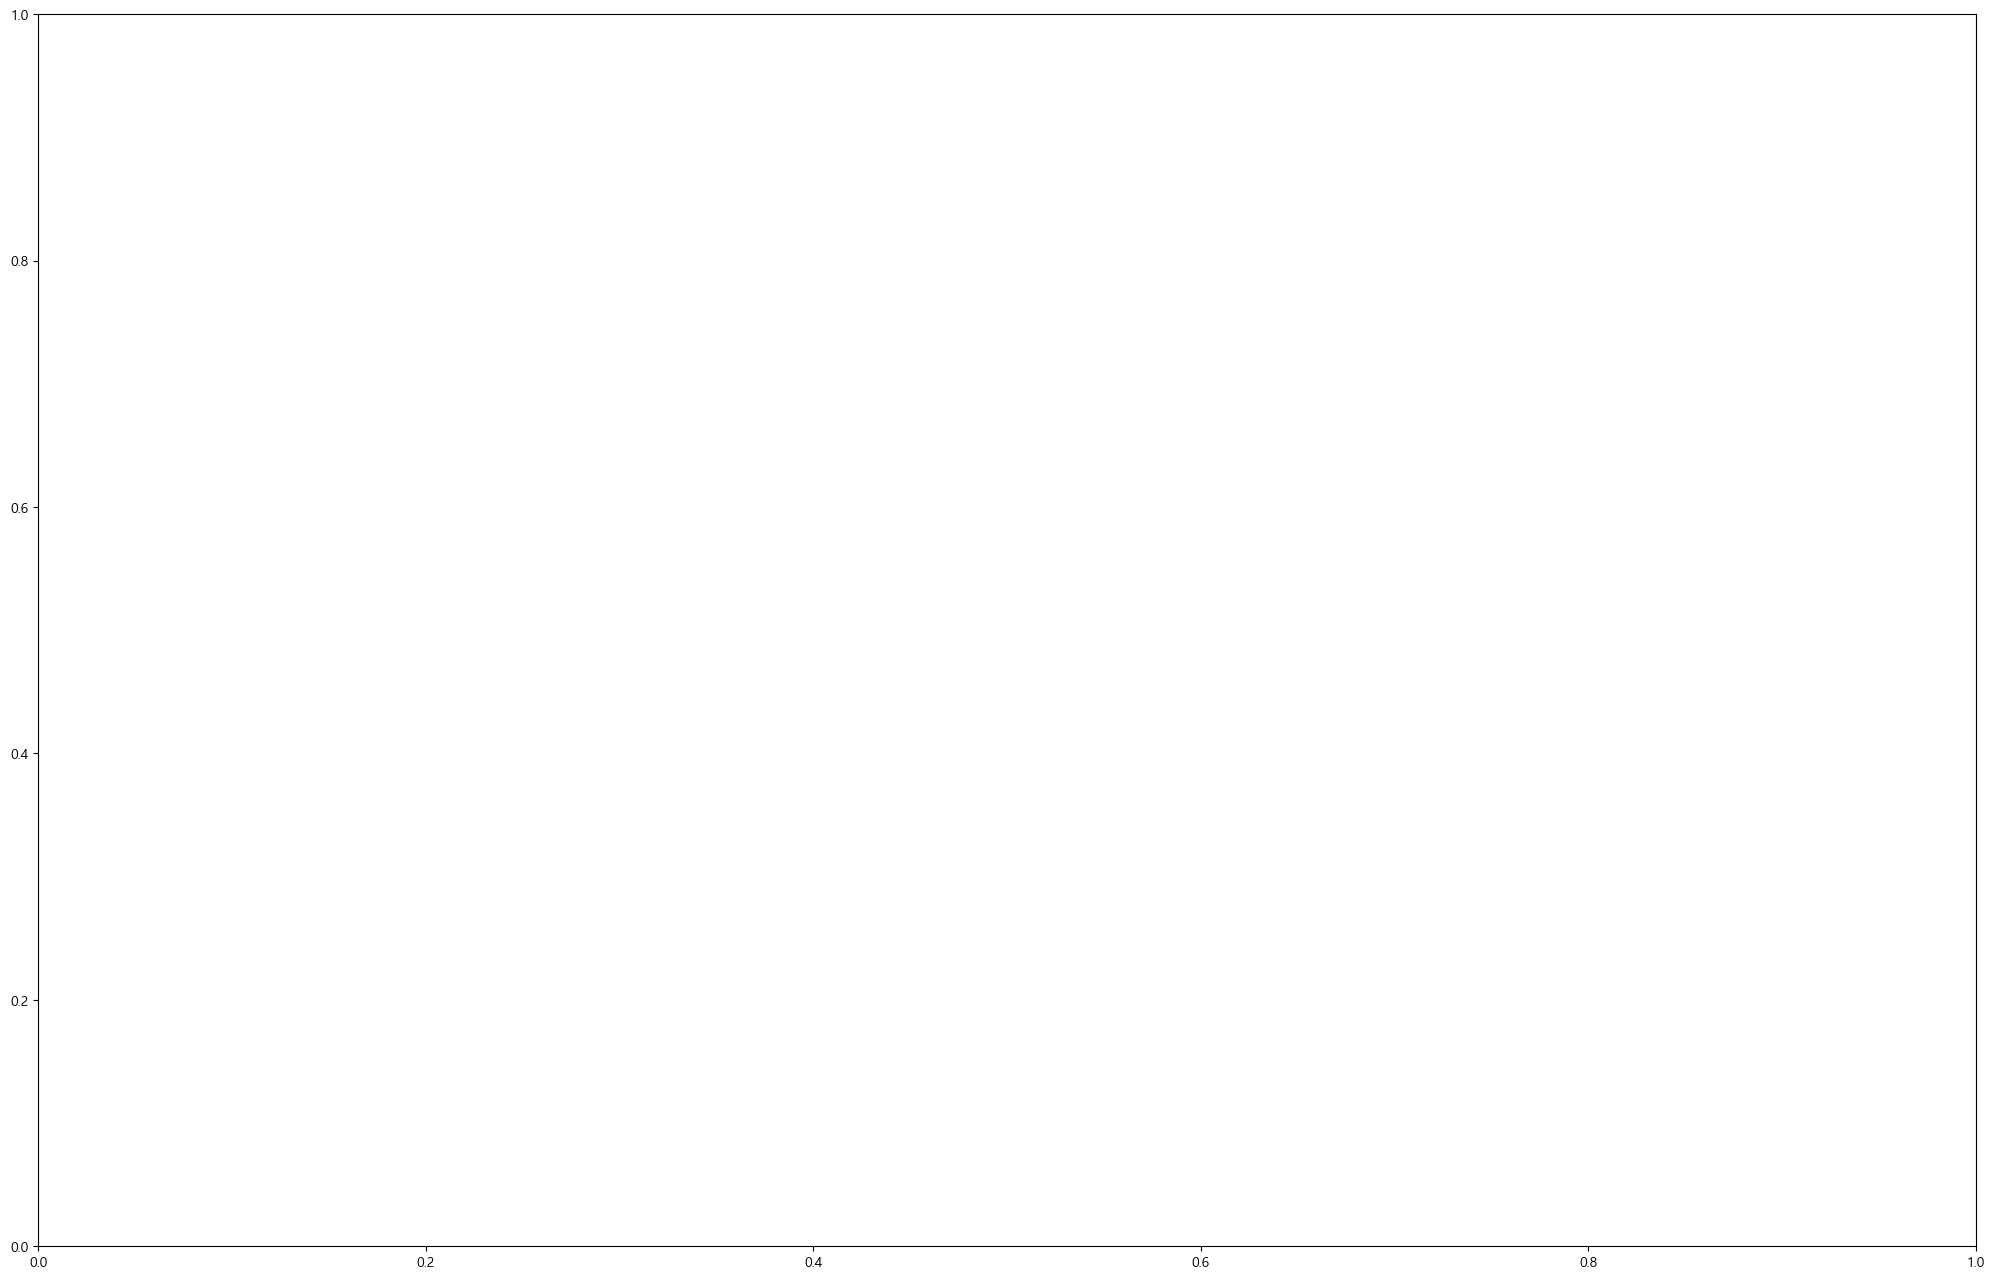

<Figure size 640x480 with 0 Axes>

In [56]:
filename = "melon_chart.csv"
df = pd.read_csv(filename)
df['singer'], df['album']  = df['album'], df['singer']
fig, ax = plt.subplots(figsize=(25, 16))
def update(frame):
    ax.clear()
    current_date = frame.to_timestamp()
    current_df = grouped.get_group(frame).head(20)
    
    # 색상 지정
    colors = ['red' if i < 3 else 'orange' if i < 10 else 'yellow' for i in range(20)]

    bars = ax.barh(current_df['title'], current_df['like'], color=colors)
    ax.set_xlabel('Likes')
    ax.set_title(f'Date: {current_date.strftime("%Y-%m-%d")}')

    # 각 막대에 순위 표시
    for bar, rank in zip(bars, current_df['rank']):
        ax.text(
            bar.get_width(), bar.get_y() + bar.get_height()/2, 
            f'#{rank}', 
            va='center', ha='right', color='black', fontsize=12
        )
    
    ax.invert_yaxis()  # 상위 순위가 위로 오도록 y축을 뒤집습니다.
    plt.tight_layout()

# 애니메이션 실행
ani = FuncAnimation(fig, update, frames=grouped.groups.keys(), repeat=False, interval=500)

# 애니메이션을 보여주기
plt.show()

# 필요하다면 애니메이션을 저장할 수도 있습니다.
ani.save('music_rankings.gif', writer='pillow', fps=1)

In [17]:
filename = "240417_melon_chart.csv"
df = pd.read_csv(filename)
df["date"] = df["date"].str[:10]


In [19]:
df['week']='.0'+df['week'].astype(str)
df['date']=df['date']+df['week']

In [21]:
del df['week']

In [22]:
df

,rank,title,singer,album,date,like
0,1,Perfect Night,LE SSERAFIM (르세라핌),Perfect Night,2024.01.01.01,114169
1,2,Drama,aespa,Drama - The 4th Mini Album,2024.01.01.01,85774
2,3,To. X,태연 (TAEYEON),To. X - The 5th Mini Album,2024.01.01.01,143853
3,4,비의 랩소디,임재현,비의 랩소디,2024.01.01.01,68851
4,5,첫 눈,EXO,겨울 스페셜 앨범 '12월의 기적 (Miracles In December)',2024.01.01.01,287034
...,...,...,...,...,...,...
37049,96,그날 이후로,나윤권,김형석 With 나윤권,2010.12.26.05,2379
37050,97,I'll Be Back,2PM,Still 2:00pm,2010.12.26.05,9493
37051,98,널 지우는 일,김지수,널 지우는 일,2010.12.26.05,1635
37052,99,Thanks To,"용준형, 양요섭",My Story,2010.12.26.05,18397


In [68]:
filename2 = "melon_chart_dummy2.csv"
df2 = pd.read_csv(filename2)
df2["date"] = df2["date"].str[:10]

df2['week']='.0'+df2['week'].astype(str)
df2['date']=df2['date']+df2['week']

del df2['week']

df2

,rank,title,singer,album,date,like
0,1,Perfect Night,LE SSERAFIM (르세라핌),Perfect Night,2024.01.01.01,114191
1,2,Drama,aespa,Drama - The 4th Mini Album,2024.01.01.01,85818
2,3,To. X,태연 (TAEYEON),To. X - The 5th Mini Album,2024.01.01.01,143931
3,4,비의 랩소디,임재현,비의 랩소디,2024.01.01.01,68931
4,5,첫 눈,EXO,겨울 스페셜 앨범 '12월의 기적 (Miracles In December)',2024.01.01.01,287040
...,...,...,...,...,...,...
37849,96,그날 이후로,나윤권,김형석 With 나윤권,2010.12.26.05,2379
37850,97,I'll Be Back,2PM,Still 2:00pm,2010.12.26.05,9493
37851,98,널 지우는 일,김지수,널 지우는 일,2010.12.26.05,1635
37852,99,Thanks To,"용준형, 양요섭",My Story,2010.12.26.05,18397


In [69]:
df2.to_csv('melon_chart.csv', index=False, encoding='utf-8-sig')

In [4]:
filename3 = "melon_chart.csv"
df = pd.read_csv(filename3)
df

,rank,title,singer,album,date,like
0,1,Perfect Night,LE SSERAFIM (르세라핌),Perfect Night,2024.01.01.01,114191
1,2,Drama,aespa,Drama - The 4th Mini Album,2024.01.01.01,85818
2,3,To. X,태연 (TAEYEON),To. X - The 5th Mini Album,2024.01.01.01,143931
3,4,비의 랩소디,임재현,비의 랩소디,2024.01.01.01,68931
4,5,첫 눈,EXO,겨울 스페셜 앨범 '12월의 기적 (Miracles In December)',2024.01.01.01,287040
...,...,...,...,...,...,...
37849,96,그날 이후로,나윤권,김형석 With 나윤권,2010.12.26.05,2379
37850,97,I'll Be Back,2PM,Still 2:00pm,2010.12.26.05,9493
37851,98,널 지우는 일,김지수,널 지우는 일,2010.12.26.05,1635
37852,99,Thanks To,"용준형, 양요섭",My Story,2010.12.26.05,18397


In [13]:
# 1. 봄 / 겨울 구분 컬럼 추가
# 봄 : spring  겨울 : winter 
data = df
data['start_date'] = data['date'].apply(lambda x : x.split('~')[0].strip())
data['start_date'] = pd.to_datetime(data['start_date'])
data['month'] = data['start_date'].dt.month
data['year'] = data['start_date'].dt.year
data['season'] = data['month'].apply(lambda x : "winter" if x in [1,2,12] else "spring")
data.drop(['start_date'],axis=1,inplace = True)




In [30]:
filename3 = "season_add_melon_chart.csv"
df = pd.read_csv(filename3)
df

,rank,title,singer,album,date,like,month,year,season
0,1,Perfect Night,LE SSERAFIM (르세라핌),Perfect Night,2024.01.01.01,114191,1,2024,winter
1,2,Drama,aespa,Drama - The 4th Mini Album,2024.01.01.01,85818,1,2024,winter
2,3,To. X,태연 (TAEYEON),To. X - The 5th Mini Album,2024.01.01.01,143931,1,2024,winter
3,4,비의 랩소디,임재현,비의 랩소디,2024.01.01.01,68931,1,2024,winter
4,5,첫 눈,EXO,겨울 스페셜 앨범 '12월의 기적 (Miracles In December)',2024.01.01.01,287040,1,2024,winter
...,...,...,...,...,...,...,...,...,...
37849,96,그날 이후로,나윤권,김형석 With 나윤권,2010.12.26.05,2379,12,2010,winter
37850,97,I'll Be Back,2PM,Still 2:00pm,2010.12.26.05,9493,12,2010,winter
37851,98,널 지우는 일,김지수,널 지우는 일,2010.12.26.05,1635,12,2010,winter
37852,99,Thanks To,"용준형, 양요섭",My Story,2010.12.26.05,18397,12,2010,winter


In [31]:
#봄 겨울 나누기
data_spring = data.loc[data.season == "spring",["rank","title","singer","album","date","like","year","season"]]
data_winter = data.loc[data.season == "winter",["rank","title","singer","album","date","like","year","season"]]

In [35]:
data_winter

,rank,title,singer,album,date,like,year,season
0,1,Perfect Night,LE SSERAFIM (르세라핌),Perfect Night,2024-01-01 01:00:00,114191,2024,winter
1,2,Drama,aespa,Drama - The 4th Mini Album,2024-01-01 01:00:00,85818,2024,winter
2,3,To. X,태연 (TAEYEON),To. X - The 5th Mini Album,2024-01-01 01:00:00,143931,2024,winter
3,4,비의 랩소디,임재현,비의 랩소디,2024-01-01 01:00:00,68931,2024,winter
4,5,첫 눈,EXO,겨울 스페셜 앨범 '12월의 기적 (Miracles In December)',2024-01-01 01:00:00,287040,2024,winter
...,...,...,...,...,...,...,...,...
37849,96,그날 이후로,나윤권,김형석 With 나윤권,2010-12-26 05:00:00,2379,2010,winter
37850,97,I'll Be Back,2PM,Still 2:00pm,2010-12-26 05:00:00,9493,2010,winter
37851,98,널 지우는 일,김지수,널 지우는 일,2010-12-26 05:00:00,1635,2010,winter
37852,99,Thanks To,"용준형, 양요섭",My Story,2010-12-26 05:00:00,18397,2010,winter


In [24]:
data_spring

,rank,title,singer,album,date,like,year,season
900,1,밤양갱,비비 (BIBI),밤양갱,2024-03-04 01:00:00,133504,2024,spring
901,2,첫 만남은 계획대로 되지 않아,TWS (투어스),TWS 1st Mini Album ‘Sparkling Blue’,2024-03-04 01:00:00,114368,2024,spring
902,3,Love wins all,아이유,The Winning,2024-03-04 01:00:00,160796,2024,spring
903,4,EASY,LE SSERAFIM (르세라핌),EASY,2024-03-04 01:00:00,68378,2024,spring
904,5,나는 아픈 건 딱 질색이니까,(여자)아이들,2,2024-03-04 01:00:00,115129,2024,spring
...,...,...,...,...,...,...,...,...
37450,96,나 같은 여자,박화요비,나 같은 여자,2010-11-28 01:00:00,6383,2010,spring
37451,97,Blowin' My Mind,브라운 아이드 소울,Browneyed Soul,2010-11-28 01:00:00,2562,2010,spring
37452,98,좋은 사람 (Feat. 마리오),모세,좋은 사람,2010-11-28 01:00:00,3573,2010,spring
37453,99,오빠가 미안하다,"서두원, 노기태",오빠가 미안하다,2010-11-28 01:00:00,147,2010,spring


In [37]:
#몇년도 등장 확인
df['date'] = pd.to_datetime(df['date'])
result_df_3 = df.groupby(['title','singer'])['date'].min().reset_index()
result_df_3

,title,singer,date
0,#결별,"길구봉구, 박보람",2018-04-16 03:00:00
1,#첫사랑,볼빨간사춘기,2018-01-08 02:00:00
2,%% (응응),Apink (에이핑크),2019-01-07 02:00:00
3,...하고 싶다,V.One,2010-03-07 02:00:00
4,..IS YOU,XIA (준수),2016-05-16 03:00:00
...,...,...,...
4980,히히하헤호,"마마무 (Mamamoo), 긱스 (Geeks)",2014-05-26 05:00:00
4981,힐링이 필요해,로이킴,2012-12-03 01:00:00
4982,힘든 건 사랑이 아니다,임창정,2020-11-30 01:00:00
4983,"힘을 내요, 그대",더필름,2011-01-02 01:00:00


In [38]:
grouped_data = df.groupby(['title','singer'])['year'].apply(set).reset_index()
grouped_data['year'] = grouped_data['year'].apply(lambda x : list(x))
grouped_data.head()

,title,singer,year
0,#결별,"길구봉구, 박보람",[2018]
1,#첫사랑,볼빨간사춘기,[2018]
2,%% (응응),Apink (에이핑크),[2019]
3,...하고 싶다,V.One,[2010]
4,..IS YOU,XIA (준수),[2016]


In [44]:
#spring
grouped_data = data_spring.groupby(['title','singer'])['year'].apply(set).reset_index()
grouped_data['year'] = grouped_data['year'].apply(lambda x : list(x))
#grouped_data.head()

# 등장년도 회수 칼럼
grouped_data['chartin_counts'] = grouped_data['year'].apply(lambda x : len(x))

# 등장년도 3이상 음원 조회
result_df_spring = grouped_data[grouped_data['chartin_counts'] >= 3]
result_df_spring

,title,singer,year,chartin_counts
30,2002,Anne-Marie,"[2019, 2020, 2021]",3
69,After LIKE,IVE (아이브),"[2024, 2022, 2023]",3
80,All I Want for Christmas Is You,Mariah Carey,"[2020, 2021, 2022]",3
94,Attention,NewJeans,"[2024, 2022, 2023]",3
171,Blueming,아이유,"[2020, 2021, 2022]",3
192,Butter,방탄소년단,"[2024, 2021, 2022, 2023]",4
321,Dynamite,방탄소년단,"[2020, 2021, 2022, 2023, 2024]",5
493,Hype Boy,NewJeans,"[2024, 2022, 2023]",3
501,I Don't Think That I Like Her,Charlie Puth,"[2024, 2022, 2023]",3
531,I'm Not The Only One,Sam Smith,"[2016, 2017, 2015]",3


In [43]:
#winter
grouped_data = data_winter.groupby(['title','singer'])['year'].apply(set).reset_index()
grouped_data['year'] = grouped_data['year'].apply(lambda x : list(x))
#grouped_data.head()

# 등장년도 회수 칼럼
grouped_data['chartin_counts'] = grouped_data['year'].apply(lambda x : len(x))

# 등장년도 3이상 음원 조회
result_df_winter = grouped_data[grouped_data['chartin_counts'] >= 3]
result_df_winter

,title,singer,year,chartin_counts
22,2002,Anne-Marie,"[2019, 2020, 2021]",3
41,A bientot,임영웅,"[2024, 2022, 2023]",3
49,After LIKE,IVE (아이브),"[2024, 2022, 2023]",3
56,All I Want for Christmas Is You,Mariah Carey,"[2016, 2017, 2018, 2019, 2020, 2021, 2022, 202...",13
69,Attention,NewJeans,"[2024, 2022, 2023]",3
...,...,...,...,...
2794,취중고백,김민석,"[2024, 2021, 2022, 2023]",4
2815,크리스마스니까,"성시경, 박효신, 이석훈, 서인국, VIXX (빅스)","[2016, 2017, 2018, 2019, 2020, 2021, 2022, 202...",13
2851,피 땀 눈물,방탄소년단,"[2016, 2017, 2018]",3
2906,해요 (2022),#안녕,"[2024, 2022, 2023]",3
